In [124]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
# from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
train_df = pd.read_csv("train.csv")
x_train = train_df
y_train = train_df["SalePrice"]

x_test = pd.read_csv('test_toup.csv')
x_test["SalePrice"] = [0] * len(x_test)
answer_df = pd.read_csv("samples submission.csv")

In [4]:
y_true = np.array(answer_df["SalePrice"])
y_true

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 129900,
       154000, 256300, 134800, 306000, 207500,  68500,  40000, 149350,
       179900, 165500, 277500, 309000, 145000, 153000, 109000,  82000,
       160000, 170000, 144000, 130250, 141000, 319900, 239686, 249700,
       113000, 127000, 177000, 114500, 110000, 385000, 130000, 180500,
       172500, 196500, 438780, 124900, 158000, 101000, 202500, 140000,
       219500, 317000, 180000, 226000,  80000, 225000, 244000, 129500,
       185000, 144900, 107400,  91000, 135750, 127000, 136500, 110000,
       193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500,
        85000, 123600, 109900,  98600, 163500, 133900, 204750, 185000,
       214000,  94750,  83000, 128950, 205000, 178000, 118964, 198900,
       169500, 250000, 100000, 115000, 115000, 190000, 136900, 180000,
      

In [5]:
x_train.shape

(1321, 81)

In [6]:
x_train["type"] = "train"
x_test["type"] = "test"

In [7]:
x_whole = pd.concat([x_train, x_test], axis = 0, ignore_index=True)
# print_all(x_whole.isnull().sum())
# print(x_train.shape)
# print(x_test.shape)
# print(x_whole.shape)

In [8]:
# sns.scatterplot(x_whole["LotFrontage"], x_whole["LotArea"])
for i in range(len(x_whole)):
    if x_whole["LotFrontage"][i] > x_whole["LotArea"][i]:
        print(i)

In [9]:
object_dtype = []

for i in x_whole.columns:
    if x_whole[i].dtype == 'object':
        object_dtype.append(i)
        
np.array(object_dtype)

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'type'], dtype='<U13')

In [10]:
x_whole["LotFrontage"].fillna(-1, inplace = True)
for i in range(len(x_whole)):
    if(x_whole["LotFrontage"][i] < 0):
        x_whole["LotFrontage"][i] = np.sqrt(x_whole["LotArea"][i])
    if x_whole["GarageYrBlt"][i] == "None":
        x_whole["GarageYrBlt"] = x_whole["YearBuilt"]



/home/timetraveller05/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
x_whole['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [12]:
valid_na_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
num_but_obj_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','GarageCars', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold']

In [14]:
#for int and float columns
meanable_cols = []


for i in x_whole.columns:
    if i not in num_but_obj_columns:
        if x_whole[i].dtypes == 'int' or x_whole[i].dtypes == 'float':
            meanable_cols.append(i)
            
meanable_cols

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [15]:
#384 - year sold
#809 - bsmt
x_whole.drop([809, 384], axis = 0, inplace=True)
y_train.drop([384, 809], axis = 0, inplace = True)
x_whole.reset_index(inplace=True)
x_whole.index

RangeIndex(start=0, stop=1458, step=1)

In [151]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [16]:

ohe = OneHotEncoder() 
for i in x_whole.columns:
    if i not in valid_na_columns:
        if i in meanable_cols:
           
            x_whole[i].fillna(-1, inplace = True)
            for j in range(len(train_df[i])):
                if train_df[i][j] < 0:
                    
                    x_whole[i][j] = random.choice([x_whole[i].mean() - x_whole[i].std(), x_whole[i].mean() + x_whole[i].std()])
        else:
#             print(i)
            x_whole[i].fillna("None", inplace = True)
            for j in range(len(x_whole[i])):
                if x_whole[i][j] == "None":
                    
                    x_whole[i][j] = random.choice(x_whole[i].dropna().unique())
            if i in object_dtype:
                x_whole[i] = le.fit_transform(x_whole[i])
                
    else:
        print(i)
        
        x_whole[i].fillna('NaN', inplace=True)
        x_whole[i] = le.fit_transform(x_whole[i])

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2


/home/timetraveller05/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [17]:
# x_whole["MasVnrArea"].unique()

In [18]:
x_whole['GarageYrBlt'].unique()

array([1997.0, 1910.0, 2005.0, 2000.0, 1999.0, 1963.0, 2004.0, 1931.0,
       2001.0, 1953.0, 1936.0, 1975.0, 2007.0, 1971.0, 1960.0, 1923.0,
       1950.0, 2009.0, 2006.0, 1984.0, 2003.0, 1959.0, 1926.0, 1977.0,
       1955.0, 1981.0, 1991.0, 1987.0, 1961.0, 1986.0, 1988.0, 1958.0,
       1935.0, 1920.0, 1957.0, 1993.0, 1990.0, 1916.0, 1979.0, 1932.0,
       1972.0, 1989.0, 1976.0, 1918.0, 1968.0, 1980.0, 1924.0, 1948.0,
       1962.0, 1964.0, 1922.0, 1996.0, 1940.0, 1939.0, 2002.0, 1995.0,
       1974.0, 1949.0, 2008.0, 1994.0, 1954.0, 1965.0, 1956.0, 1978.0,
       1966.0, 1982.0, 1951.0, 1992.0, 1970.0, 1998.0, 1925.0, 1983.0,
       1941.0, 1930.0, 2010.0, 1985.0, 1927.0, 1947.0, 1906.0, 1937.0,
       1973.0, 1942.0, 1915.0, 1938.0, 1967.0, 1952.0, 1928.0, 1933.0,
       'None', 1934.0, 1969.0, 1908.0, 1921.0, 1914.0, 1945.0, 1946.0,
       1929.0, 1900.0], dtype=object)

In [19]:
# cor = x_whole.corr()
# cor_target = abs(cor["BsmtQual"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target > 0.2]
# print(relevant_features)


In [20]:
le.inverse_transform(x_whole["type"])

array(['train', 'train', 'train', ..., 'test', 'test', 'test'],
      dtype=object)

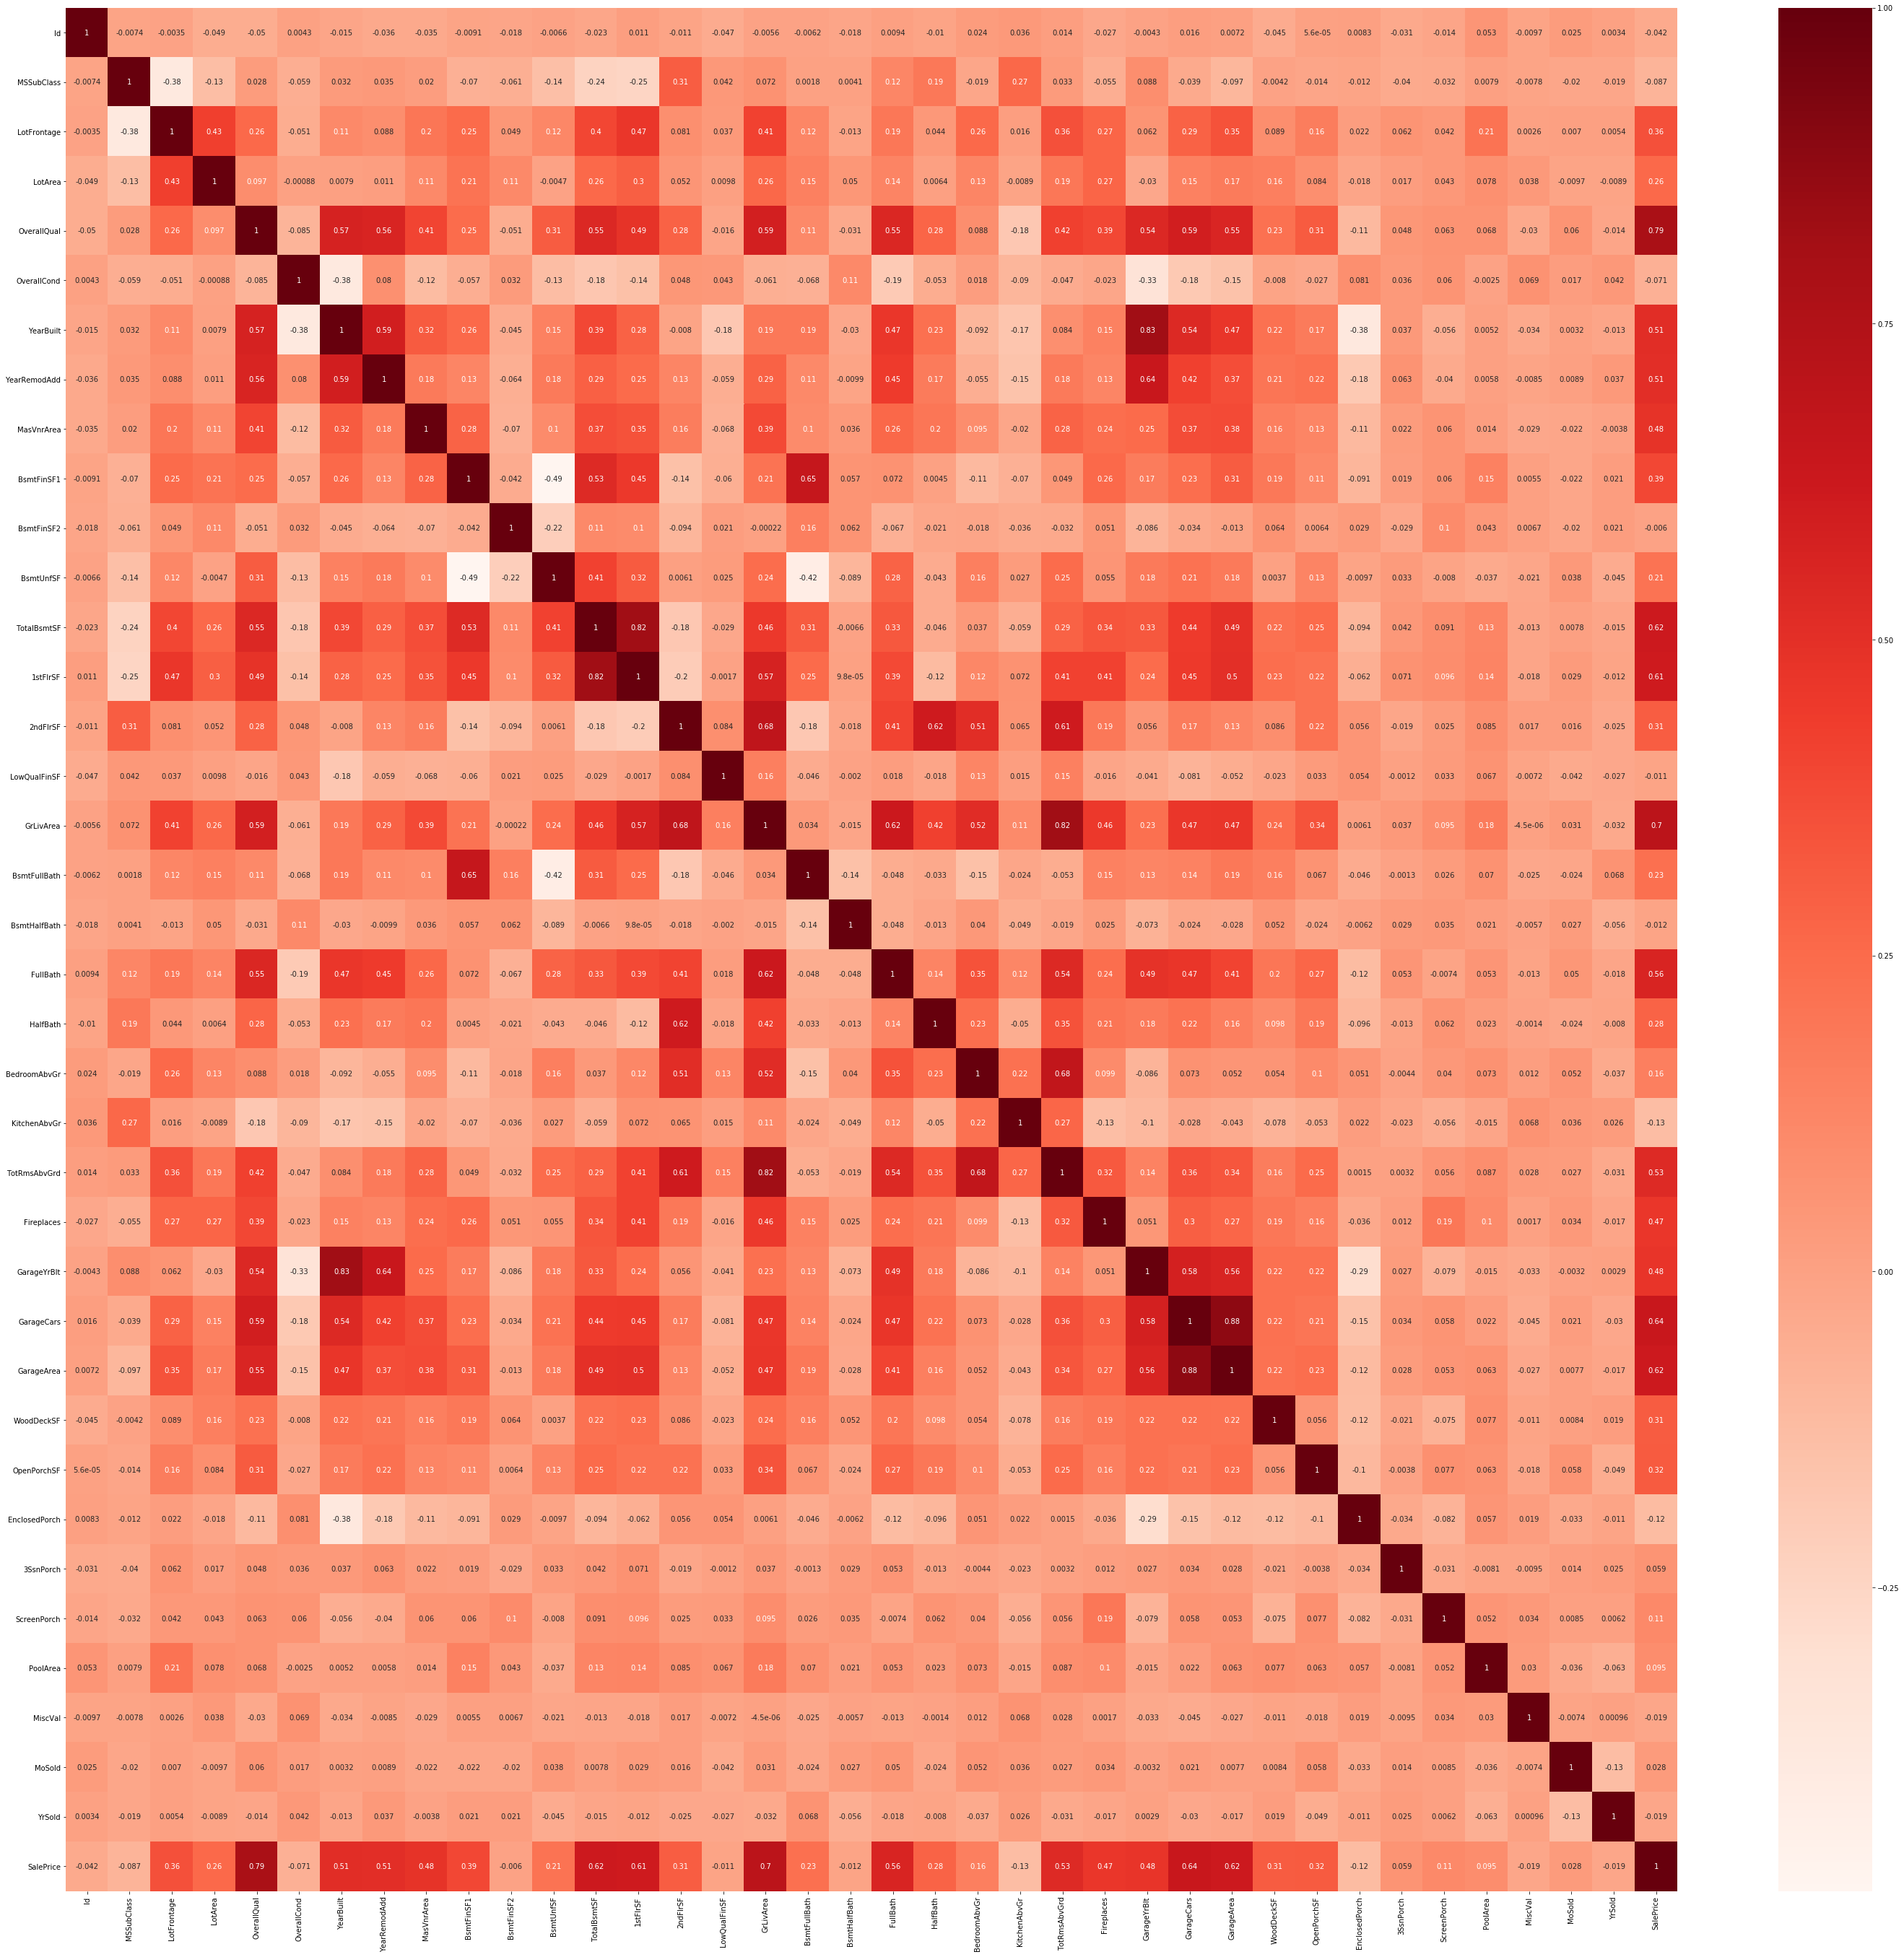

In [21]:
# x_whole.drop(["LotFrontage"], axis = 1, inplace = True)
plt.figure(figsize=(50,48))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
# x_whole["new_col_overall"] = x_whole["OverallCond"] + x_whole["OverallQual"]
# x_whole["new_col_bsmt"] = x_whole["BsmtCond"] + x_whole["BsmtQual"]
x_whole.drop(["Condition2", "Exterior2nd"], axis=1, inplace=True)


In [23]:
# x_whole["total_overall"] = (x_whole["OverallQual"] + x_whole["OverallCond"])/2
# x_whole["Area"] = x_whole["1stFlrSF"] + x_whole["2ndFlrSF"] + x_whole["TotalBsmtSF"] + x_whole["MasVnrArea"] + x_whole["GarageArea"] + x_whole["GrLivArea"] + x_whole["PoolArea"]


# features = ["EnclosedPorch", "MiscVal", "BsmtHalfBath"]
# for i in features:
#     x_whole["squared" + i] = x_whole[i] ** 2
    
x_whole.drop(["EnclosedPorch", "MiscVal","GarageYrBlt", "TotRmsAbvGrd", "MasVnrArea", "PoolArea", "Utilities", "3SsnPorch"], axis=1, inplace=True)
# x_whole.drop([], axis=1, inplace=True)


In [24]:
cor = x_whole.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 0.05]
print(relevant_features)

MSSubClass      0.048912
Street          0.036121
LandContour     0.011289
LotConfig       0.018205
OverallCond     0.044867
MasVnrType      0.043961
BsmtFinSF2      0.005218
LowQualFinSF    0.016158
BsmtHalfBath    0.014558
MoSold          0.023191
YrSold          0.016209
SaleType        0.048061
Name: SalePrice, dtype: float64


In [25]:
columns = x_whole.columns

x_whole = x_whole.values
x_whole = StandardScaler().fit_transform(x_whole)

In [26]:
x_whole = pd.DataFrame(x_whole, columns=columns)

In [27]:
x_whole.columns = columns

In [28]:
x_whole["type"]

0       0.324627
1       0.324627
2       0.324627
3       0.324627
4       0.324627
5       0.324627
6       0.324627
7       0.324627
8       0.324627
9       0.324627
10      0.324627
11      0.324627
12      0.324627
13      0.324627
14      0.324627
15      0.324627
16      0.324627
17      0.324627
18      0.324627
19      0.324627
20      0.324627
21      0.324627
22      0.324627
23      0.324627
24      0.324627
25      0.324627
26      0.324627
27      0.324627
28      0.324627
29      0.324627
          ...   
1428   -3.080456
1429   -3.080456
1430   -3.080456
1431   -3.080456
1432   -3.080456
1433   -3.080456
1434   -3.080456
1435   -3.080456
1436   -3.080456
1437   -3.080456
1438   -3.080456
1439   -3.080456
1440   -3.080456
1441   -3.080456
1442   -3.080456
1443   -3.080456
1444   -3.080456
1445   -3.080456
1446   -3.080456
1447   -3.080456
1448   -3.080456
1449   -3.080456
1450   -3.080456
1451   -3.080456
1452   -3.080456
1453   -3.080456
1454   -3.080456
1455   -3.0804

In [29]:
features = ["GarageArea", "GarageCars"]

# Separating out the features
x = x_whole.loc[:, features].values
# Separating out the target

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["Garage_things"])
x_whole["Garage_things"] = principalDf["Garage_things"]
x_whole.drop(["GarageArea", "GarageCars"], axis=1, inplace=True)

In [30]:
x_whole["TotalBsmtSF"].unique()

array([-2.94148184e-01, -4.41123833e-01,  1.55682639e+00, -3.35485085e-01,
        9.96481728e-01,  1.54304742e+00, -1.97695415e-01, -7.83301514e-01,
       -3.95193943e-01,  5.49189808e-02, -3.67636008e-01, -1.99991909e-01,
        1.50171052e+00, -5.30687118e-01,  1.25368911e+00,  3.30498322e-01,
       -1.11170023e+00, -2.42529509e+00, -6.47808338e-01, -1.49469030e-01,
        7.71425267e-01,  4.03986146e-01,  1.18479428e+00,  1.11360295e+00,
       -3.99786932e-01,  2.13377102e-01, -9.46352624e-01,  1.28813653e+00,
        1.20775922e+00, -4.96239701e-01,  1.44659465e+00, -7.71819042e-01,
        1.81750687e-02,  7.02530432e-01,  1.26287509e+00,  3.35091311e-01,
        2.17970091e-01, -9.38286542e-03,  2.66373674e+00, -2.02288404e-01,
       -6.89145239e-01, -6.04174943e-01, -1.26786186e+00,  1.16924332e-01,
        3.02940387e-01, -9.09608712e-01,  6.86979478e-02,  1.23302066e+00,
       -4.66385272e-01, -7.60336569e-01,  8.60988553e-01, -4.61792283e-01,
        1.53845443e+00,  

In [31]:
features = ["1stFlrSF", "TotalBsmtSF"]

# Separating out the features
x = x_whole.loc[:, features].values
# Separating out the target
# y = x_whole.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["SF_area"])

In [32]:
principalDf

,SF_area
0,-0.638734
1,-0.860760
2,2.157402
3,-0.701179
4,1.331227
5,2.136587
6,-0.493030
7,-1.082418
8,-0.791377
9,-0.111423


In [33]:
x_whole["SF_Area"] = principalDf["SF_area"]
x_whole.drop(["1stFlrSF", "TotalBsmtSF", "MoSold"], axis=1, inplace=True)

In [34]:
x_whole.drop(["KitchenAbvGr", "BsmtHalfBath", "LowQualFinSF", "Street" ], axis=1, inplace=True)

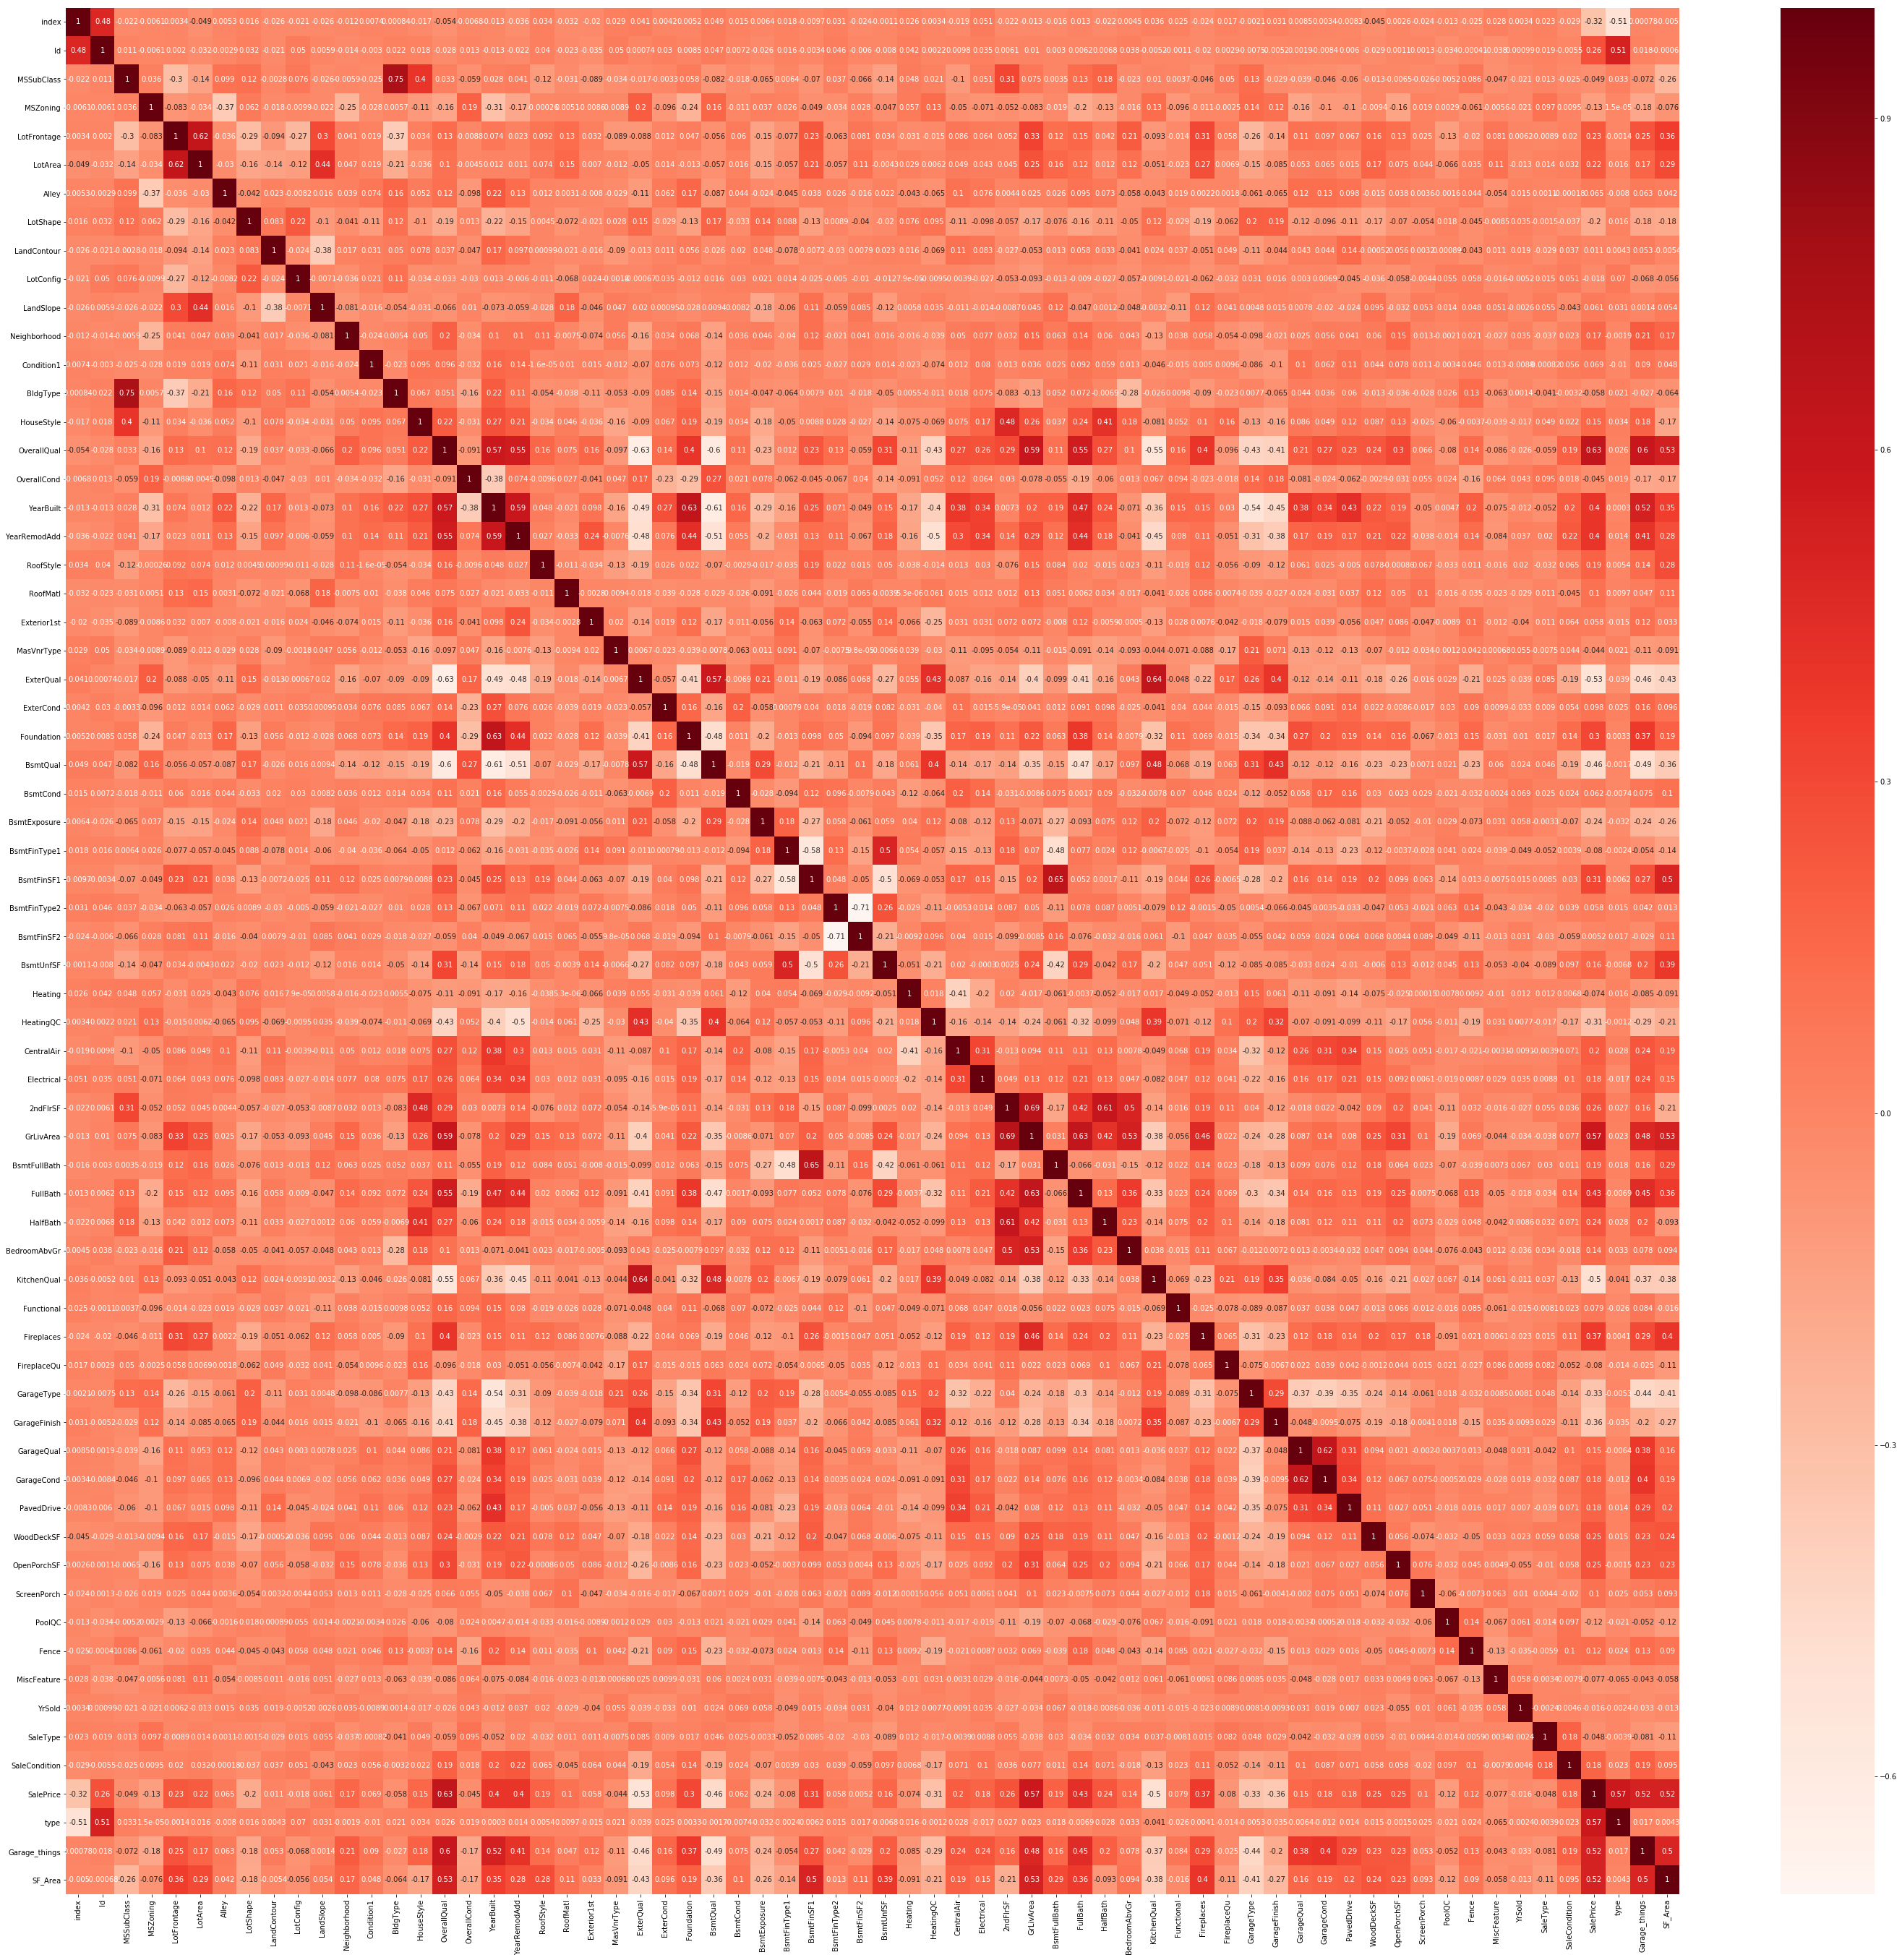

In [35]:
plt.figure(figsize=(50,48))
cor = x_whole.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
# features = ["YearBuilt", "YearRemodAdd"]

# # Separating out the features
# x = x_whole.loc[:, features].values
# # Separating out the target
# # y = x_whole.loc[:,['target']].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=1)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ["Yr_things"])

# x_whole["Yr_things"] = principalDf["Yr_things"]
x_whole.drop(["YearRemodAdd"], axis=1, inplace=True)

In [37]:
x_whole.drop("SalePrice", axis=1, inplace=True)
x_train = x_whole[x_whole["type"] > 0]
x_test = x_whole[x_whole["type"] < 0]
print(x_train.shape)
print(x_test.shape)
x_train.drop("type", axis = 1, inplace=True)
x_test.drop("type", axis = 1, inplace = True)

(1319, 64)
(139, 64)


/home/timetraveller05/.local/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
# for i in range(len(x_whole)):
#     if(x_whole["YearBuilt"][i] > x_whole["YrSold"][i] or x_whole["YrSold"][i] < x_whole["YearRemodAdd"][i]):
#         print(i)

In [39]:
# model = XGBClassifier()
# model.fit(x_train, y_train)

In [40]:
# model = SVR(kernel='linear')
# model.fit(x_train, y_train)

In [41]:
# model = RandomForestRegressor(n_estimators = 4, random_state = 14)
# model.fit(x_train, y_train)

In [ ]:
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

In [138]:
model = Lasso(normalize=True)
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [139]:
y_pred = model.predict(x_test)

In [140]:
y_pred

array([213039.91044919, 194708.97532493, 229074.7757945 , 174552.51215498,
       285217.96406522, 154862.53671392, 282037.58030545, 234456.03631663,
       160051.96417366,  97813.87376493, 128054.71929176, 372906.40456924,
       134622.70784654, 235176.7748841 , 155391.03902574, 126187.75415185,
       139313.90254699, 100059.71866681, 148364.36141145, 109117.81471417,
       305636.73580695, 117789.43695651, 240503.24728554, 125080.44432531,
       141047.95291544, 231821.80456456, 127125.11489881, 266011.38276438,
       198311.02228545,  72711.5094016 ,  85470.9735259 , 122510.39987881,
       211275.58235547, 180100.51845654, 298903.16299586, 300211.57433153,
       123577.15162338, 142546.71001656, 112153.24686117,  85911.89762365,
       130920.57705271, 150767.4637926 , 157563.47980721, 135428.95026641,
       126019.64420832, 297114.97205624, 290704.66095957, 248696.74467991,
        74233.29303944, 122624.78811986, 172514.45506792, 114153.82678595,
       114735.76849501, 3

In [141]:
df_out = pd.DataFrame(y_pred)

In [142]:
df_out


,0
0,213039.910449
1,194708.975325
2,229074.775795
3,174552.512155
4,285217.964065
5,154862.536714
6,282037.580305
7,234456.036317
8,160051.964174
9,97813.873765


In [143]:
df_out.columns = ["SalePrice"]

In [144]:
df_out["Id"] = df_out.index

In [145]:
df_out = df_out[["Id", "SalePrice"]]

In [146]:
df_out


,Id,SalePrice
0,0,213039.910449
1,1,194708.975325
2,2,229074.775795
3,3,174552.512155
4,4,285217.964065
5,5,154862.536714
6,6,282037.580305
7,7,234456.036317
8,8,160051.964174
9,9,97813.873765


In [147]:
df_out["Id"] = range(1, 140)
df_out["SalePrice"] = df_out["SalePrice"].astype(int)

In [148]:
df_out.set_index("Id")

,SalePrice
Id,
1,213039
2,194708
3,229074
4,174552
5,285217
6,154862
7,282037
8,234456
9,160051


In [149]:
df_out.to_csv("ouput.csv", index = False)

In [150]:
print(np.sqrt(metrics.mean_squared_error(y_true, df_out["SalePrice"])))

21207.674153984513
